In [1]:
%load_ext autoreload
%autoreload 
import matplotlib.pyplot as plt
import csv

In [2]:
b_losses = []
d_losses = []

with open('/home/lcur1339/dl2-cgn/cgn_framework/imagenet/experiments/bgn_2022_06_05_01_10_tmp/losses/losses.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(lines):
        if i == 0: b_losses = row[1:]
        else: d_losses = row[1:]


In [3]:
b_losses = [round(float(elem), 3) for elem in b_losses ]
d_losses = [round(float(elem), 3) for elem in d_losses]
print(b_losses[:10])

[0.062, 0.273, 0.144, 0.413, 0.166, 0.343, 0.246, 0.181, 0.255, 0.202]


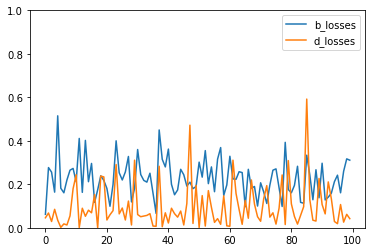

In [4]:
plt.plot(b_losses[::100], label='b_losses')
plt.plot(d_losses[::100], label='d_losses')
#plt.plot(d_losses, label='d_losses')
ax = plt.gca()
ax.set_ylim([0,1])
plt.legend()
plt.show()

In [5]:
from imagenet.models import CGN
from imagenet.models.gp_gan import BlendNet

In [23]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torchvision
from torchvision.utils import make_grid

In [20]:
torch.device('cpu').type

'cpu'

## Creating a grid of refined examples

In [50]:
# loading imageas
import numpy as np
import cv2 

comp0 = cv2.cvtColor(cv2.imread("/home/lcur1339/dl2-cgn/cgn_framework/imagenet/data/cgnxgp/GP_refinement/2022_06_06_16_for_inception_trunc_0.5/ims/for_inception_0000000_x_.jpg"), cv2.COLOR_BGR2RGB)
ref0 = cv2.cvtColor(cv2.imread("/home/lcur1339/dl2-cgn/cgn_framework/imagenet/data/cgnxgp/GP_refinement/2022_06_06_16_for_inception_trunc_0.5/ims/for_inception_0000000_x_gp_refined.jpg"), cv2.COLOR_BGR2RGB)
comp1 = cv2.cvtColor(cv2.imread("/home/lcur1339/dl2-cgn/cgn_framework/imagenet/data/cgnxgp/GP_refinement/2022_06_06_16_for_inception_trunc_0.5/ims/for_inception_0000012_x_.jpg"), cv2.COLOR_BGR2RGB)
ref1 = cv2.cvtColor(cv2.imread("/home/lcur1339/dl2-cgn/cgn_framework/imagenet/data/cgnxgp/GP_refinement/2022_06_06_16_for_inception_trunc_0.5/ims/for_inception_0000012_x_gp_refined.jpg"), cv2.COLOR_BGR2RGB)
comp2 = cv2.cvtColor(cv2.imread("/home/lcur1339/dl2-cgn/cgn_framework/imagenet/data/cgnxgp/GP_refinement/2022_06_06_16_for_inception_trunc_0.5/ims/for_inception_0000001_x_.jpg"), cv2.COLOR_BGR2RGB)
ref2 = cv2.cvtColor(cv2.imread("/home/lcur1339/dl2-cgn/cgn_framework/imagenet/data/cgnxgp/GP_refinement/2022_06_06_16_for_inception_trunc_0.5/ims/for_inception_0000001_x_gp_refined.jpg"), cv2.COLOR_BGR2RGB)
comp3 = cv2.cvtColor(cv2.imread("/home/lcur1339/dl2-cgn/cgn_framework/imagenet/data/cgnxgp/GP_refinement/2022_06_06_16_for_inception_trunc_0.5/ims/for_inception_0000009_x_.jpg"), cv2.COLOR_BGR2RGB)
ref3 = cv2.cvtColor(cv2.imread("/home/lcur1339/dl2-cgn/cgn_framework/imagenet/data/cgnxgp/GP_refinement/2022_06_06_16_for_paper_trunc_0.5/ims/for_paper_0000009_x_gp_refined.jpg"), cv2.COLOR_BGR2RGB)
comp4 = cv2.cvtColor(cv2.imread("/home/lcur1339/dl2-cgn/cgn_framework/imagenet/data/cgnxgp/GP_refinement/2022_06_06_16_for_paper_trunc_0.5/ims/for_paper_0000013_x_.jpg"), cv2.COLOR_BGR2RGB)
ref4 = cv2.cvtColor(cv2.imread("/home/lcur1339/dl2-cgn/cgn_framework/imagenet/data/cgnxgp/GP_refinement/2022_06_06_16_for_paper_trunc_0.5/ims/for_paper_0000013_x_gp_refined.jpg"), cv2.COLOR_BGR2RGB)
comp5 = cv2.cvtColor(cv2.imread("/home/lcur1339/dl2-cgn/cgn_framework/imagenet/data/cgnxgp/GP_refinement/2022_06_06_17_for_paper2_trunc_0.5/ims/for_paper2_0000010_x_.jpg"), cv2.COLOR_BGR2RGB)
ref5 = cv2.cvtColor(cv2.imread("/home/lcur1339/dl2-cgn/cgn_framework/imagenet/data/cgnxgp/GP_refinement/2022_06_06_17_for_paper2_trunc_0.5/ims/for_paper2_0000010_x_gp_refined.jpg"), cv2.COLOR_BGR2RGB)




In [51]:
to_plot = [comp0, ref0, comp1, ref1, comp2, ref2, comp3, ref3, comp4, ref4, comp5, ref5 ]

to_plot_tensors = [torch.Tensor(im.transpose(2,0,1)).unsqueeze(0) for im in to_plot]
to_plot_tensors[0].shape

torch.Size([1, 3, 256, 256])

In [52]:
# build class grid

grid = make_grid(torch.cat(to_plot_tensors).detach().cpu(),
                 nrow=6, padding=2, normalize=True)

# save to disk
torchvision.utils.save_image(grid, 'grid_test.png')

In [33]:
cgn = CGN(1)
weights = torch.load("imagenet/weights/cgn.pth", map_location=torch.device('cpu'))
weights = {k.replace('module.', ''): v for k, v in weights.items()}
cgn.load_state_dict(weights)

NameError: name 'CGN' is not defined

In [9]:
x_gt, mask, _, foreground, background, _ = cgn()
img_comp = mask * foreground + (1 - mask) * background

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Mask')

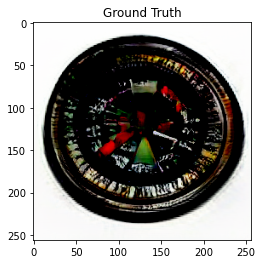

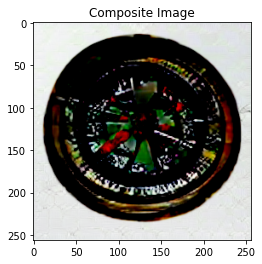

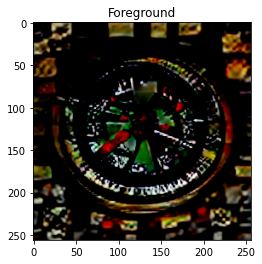

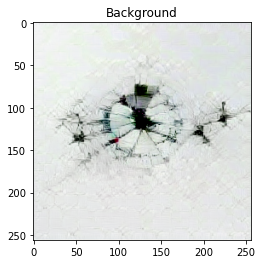

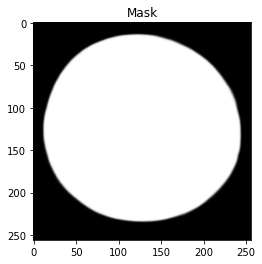

In [10]:
# printing the results
plt.imshow(x_gt.detach().squeeze(0).transpose(1,0).transpose(2,1))
plt.title('Ground Truth')
plt.figure()
plt.imshow(img_comp.detach().squeeze(0).transpose(1,0).transpose(2,1))
plt.title('Composite Image')
plt.figure()
plt.imshow(foreground.detach().squeeze(0).transpose(1,0).transpose(2,1))
plt.title('Foreground')
plt.figure()
plt.imshow(background.detach().squeeze(0).transpose(1,0).transpose(2,1))
plt.title('Background')
plt.figure()
plt.imshow(mask.detach().squeeze(), cmap='gray')
plt.title('Mask') 



## Integrating and using the Chainer BlendGAN in our model

In [11]:
from chainer import cuda, serializers, Variable
import chainer
import numpy as np

from imagenet.models.blending_gan import EncoderDecoder

def preprocess(im):
    """ Input: np array [-1,1] H,W,C => [0,1] C,H,W"""
    im = np.transpose(im * 2 - 1, (2, 0, 1)).astype(np.float32)
    return im

/home/lcur1339/.conda/envs/cgn-gpu/lib/python3.9/site-packages/chainer/_environment_check.py:72: UserWarning: 
--------------------------------------------------------------------------------
CuPy (cupy) version 10.5.0 may not be compatible with this version of Chainer.
Please consider installing the supported version by running:
  $ pip install 'cupy>=7.7.0,<8.0.0'

See the following page for more details:
  https://docs.cupy.dev/en/latest/install.html
--------------------------------------------------------------------------------

  warnings.warn(msg.format(


In [12]:
model = EncoderDecoder(nef=64, ngf=64, nc=3, nBottleneck=4000, image_size=64)
weights_path = './imagenet/weights/blending_gan.npz'
serializers.load_npz(weights_path, model)

In [13]:
# preprocess the generated image
comp_resz = torchvision.transforms.functional.resize(img_comp, size=(64,64))
comp_set = comp_resz.detach().squeeze(0).cpu().numpy().transpose(1,2,0)
print(comp_set.shape, comp_set.min(), comp_set.max())

(64, 64, 3) -0.979262 0.98109806


In [14]:
# composite_inp = Variable(chainer.dataset.concat_examples([preprocess(comp_set)], -1))  # negative value argument indicates cpu. Figure out how to configure for GPU properly
composite_inp = Variable(chainer.dataset.concat_examples([comp_set.transpose(2,0,1).astype(np.float32)], -1))  # negative value argument indicates cpu. Figure out how to configure for GPU properly
comp_out = model(composite_inp)
print("GAN outputs min,max:", comp_out.data.min(), comp_out.data.max())
gan_im = np.clip(np.transpose((np.squeeze(cuda.to_cpu(comp_out.data)) + 1) / 2, (1, 2, 0)), 0, 1).astype('float')
print(gan_im.shape, gan_im.min(), gan_im.max())

/home/lcur1339/.conda/envs/cgn-gpu/lib/python3.9/site-packages/chainer/functions/normalization/batch_normalization.py:395: UserWarning: A batch with no more than one sample has been given to F.batch_normalization. F.batch_normalization will always output a zero tensor for such batches. This could be caused by incorrect configuration in your code (such as running evaluation while chainer.config.train=True), but could also happen in the last batch of training if non-repeating iterator is used.
  warnings.warn(


GAN outputs min,max: -0.91655785 0.9208371
(64, 64, 3) 0.041721075773239136 0.9604185819625854


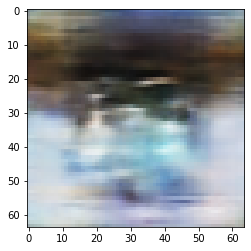

In [15]:
plt.imshow(gan_im)

### Passing the blend GANs output through the rest of the pipeline

In [16]:
from imagenet.models.gp_gan import gp_gan

In [17]:
gp_out = gp_gan(foreground, background, mask, gan_im, color_weight=1e-7, image_size=64, blend_net_configed=True)

/home/lcur1339/dl2-cgn/cgn_framework/imagenet/models/gp_gan.py:357: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  smoothed = gaussian(img_pyramid[-1], smooth_sigma, multichannel=True)


In [18]:
print(type(gp_out))
print(gp_out.dtype)
print(gp_out.shape)
print(gp_out.min(), gp_out.max())

<class 'numpy.ndarray'>
uint8
(256, 256, 3)
0 255


: 

<Figure size 432x288 with 0 Axes>

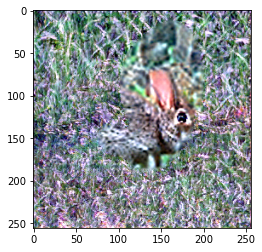

<Figure size 432x288 with 0 Axes>

In [56]:
plt.imshow(gp_out)
plt.figure()
#plt.imshow(img_comp.detach().numpy().squeeze(0).transpose(1,2,0))

0 255


: 

## Experimenting w/ other BlendNet versions

In [ ]:
# loading the blend net
model = BlendNet()

PATH = "./imagenet/weights/blend_net_weights.pth" 
model.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))

<All keys matched successfully>

In [33]:
def gradient_info_print(named_parameters):
    num_p = 0
    sum_norms = 0
    layers = []
    grads_per_layer = []
    for n, param in named_parameters:
        num_p += param.numel()
        sum_norms += torch.norm(param)
        print(torch.norm(param))
        if(param.requires_grad) and ("bias" not in n) and param is not None:
            layers.append(n)
            if param.grad is not None:
                grads_per_layer.append(param.grad.abs().mean())

    return (num_p, sum_norms, sum_norms/num_p, grads_per_layer)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


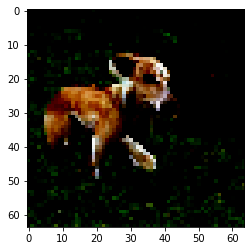

In [34]:
# model expects 64x64 imgs so resize...
img_resz = torchvision.transforms.functional.resize(img_comp, size=(64,64))
plt.imshow(img_resz.squeeze(0).detach().numpy().transpose(1,2,0))

In [35]:
# attempting to track the gradients
model.train()
xl_from_net = model(img_resz)#.squeeze(0))
print(xl_from_net.size())
#plt.imshow(xl_from_net.detach().squeeze(0).numpy().transpose(1,2,0))
print(xl_from_net.max())
print(xl_from_net.min())
opt = torch.optim.Adam(model.parameters(),lr=0, betas=(0.9, 0.999))
x_gt_rsz = torchvision.transforms.functional.resize(x_gt, size=(64,64))
loss = torch.nn.MSELoss()(xl_from_net, x_gt_rsz)
loss.backward(retain_graph=True)
opt.step()

num_p, sum_norms, avg_param_size, grads_per_layer = gradient_info_print(model.named_parameters())


torch.Size([1, 3, 64, 64])
tensor(0.4037, grad_fn=<MaxBackward1>)
tensor(0., grad_fn=<MinBackward1>)
tensor(1.2569, grad_fn=<CopyBackwards>)
tensor(0., grad_fn=<CopyBackwards>)
tensor(2.4712, grad_fn=<CopyBackwards>)
tensor(0.6501, grad_fn=<CopyBackwards>)
tensor(9.9628, grad_fn=<CopyBackwards>)
tensor(0.2097, grad_fn=<CopyBackwards>)
tensor(13.8401, grad_fn=<CopyBackwards>)
tensor(0.2088, grad_fn=<CopyBackwards>)
tensor(19.2472, grad_fn=<CopyBackwards>)
tensor(0.2134, grad_fn=<CopyBackwards>)
tensor(33.0810, grad_fn=<CopyBackwards>)
tensor(0.4187, grad_fn=<CopyBackwards>)
tensor(32.8298, grad_fn=<CopyBackwards>)
tensor(0.1622, grad_fn=<CopyBackwards>)
tensor(19.3722, grad_fn=<CopyBackwards>)
tensor(0.1611, grad_fn=<CopyBackwards>)
tensor(13.7369, grad_fn=<CopyBackwards>)
tensor(0.1801, grad_fn=<CopyBackwards>)
tensor(9.9744, grad_fn=<CopyBackwards>)
tensor(0.1716, grad_fn=<CopyBackwards>)
tensor(2.5750, grad_fn=<CopyBackwards>)
tensor(0.1033, grad_fn=<CopyBackwards>)


In [39]:
print(avg_param_size)
print(grads_per_layer)

tensor(2.2635e-06, grad_fn=<DivBackward0>)
[tensor(0.0054), tensor(0.0002), tensor(0.0002), tensor(0.0003), tensor(0.0001), tensor(0.0002), tensor(0.0012), tensor(0.0021), tensor(0.0029), tensor(0.0153)]


: 

from experiments:
min,max: (0, 0.126), (0, 0.36), (0, 23.9), (0, 326.14), (0, 2381.92)
avg weight:  (2.0766e-06), (2.0797e-06), (2.0980e-06), (2.1245e-06)

## gradient printing &#8593; output testing &#8595;

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


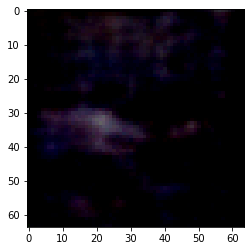

In [ ]:
model.eval()
xl_from_net = model(img_resz)#.squeeze(0))
print(xl_from_net.size())
plt.imshow(xl_from_net.detach().squeeze(0).numpy().transpose(1,2,0))
print(xl_from_net.max())
print(xl_from_net.min())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


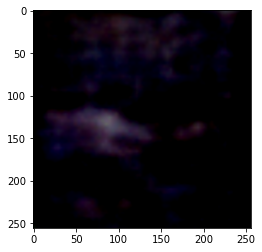

In [ ]:
xl = torchvision.transforms.functional.resize(xl_from_net, size=(256,256))
plt.imshow(xl.detach().squeeze(0).numpy().transpose(1,2,0))

In [ ]:
# from imagenet.train_bgan import save_sample_sheet

# save_sample_sheet(model, cgn, "imagenet/experiments", '0')

PermissionError: [Errno 13] Permission denied: '/home/lcur1339/dl2-cgn/cgn_framework/imagenet/experiments/blendnetinput.png'

: 